In [1]:
import pandas as pd
import math 
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../src')
import utils_explore as ue

data = ue.all_bets()

In [2]:
# summary on all authors for all time
# + picking the most interesting ones
# -> then exploring them

# alltime summary
ue.summary_chart(data,[30,250,1000,5000],0.0)

,author,count,return,win,success_rate,category
36,teplofevralya,1467.0,1485.28,18.28,1.246080,"(1000.0, 5000.0]"
7,chaplygin,273.0,335.86,62.86,23.025641,"(250.0, 1000.0]"
41,zhukov,663.0,733.25,70.25,10.595777,"(250.0, 1000.0]"
13,falcao1984,435.0,465.97,30.97,7.119540,"(250.0, 1000.0]"
35,stavkaprognozsport,798.0,838.96,40.96,5.132832,"(250.0, 1000.0]"
18,karpovvyacheslav,45.0,48.10,3.10,6.888889,"(30.0, 250.0]"
26,netsenko,122.0,129.73,7.73,6.336066,"(30.0, 250.0]"
25,naguchevroman,67.0,68.33,1.33,1.985075,"(30.0, 250.0]"
11,emmagadzhieva,8.0,11.00,3.00,37.500000,NaN


In [3]:
# only last year
df_sum_19 = ue.summary_chart(data[data['placed-date'] >= datetime.date(2019, 1, 1)],
                             min_rate_thres=3.0)
#drop authors that play way too occasionally
df_sum_19 = df_sum_19[df_sum_19['count']>=20]
### emmagadzhieva goes out
df_sum_19

,author,count,return,win,success_rate
29,nvaluev,24.0,30.70,6.70,27.916667
7,chaplygin,167.0,201.56,34.56,20.694611
31,ostapbender,29.0,34.18,5.18,17.862069
18,karpovvyacheslav,45.0,48.10,3.10,6.888889
26,netsenko,122.0,129.73,7.73,6.336066
21,kozhevnikov,325.0,343.99,18.99,5.843077
13,falcao1984,275.0,288.52,13.52,4.916364
41,zhukov,163.0,170.23,7.23,4.435583
36,teplofevralya,476.0,493.88,17.88,3.756303


In [4]:
#get extended stats on all candidates
candidates = list(df_sum_19.author)
cand_data = data[data.author.isin(candidates)]
ue.summary_chart(cand_data)
### some authors (nvaluev, kozhevnikov, ostapbender, teplofevralya) have
### really poor results in all time table

,author,count,return,win,success_rate
0,chaplygin,273.0,335.86,62.86,23.025641
8,zhukov,663.0,733.25,70.25,10.595777
1,falcao1984,435.0,465.97,30.97,7.119540
2,karpovvyacheslav,45.0,48.10,3.10,6.888889
4,netsenko,122.0,129.73,7.73,6.336066
7,teplofevralya,1467.0,1485.28,18.28,1.246080
5,nvaluev,183.0,180.50,-2.50,-1.366120
6,ostapbender,638.0,612.30,-25.70,-4.028213
3,kozhevnikov,559.0,528.17,-30.83,-5.515206


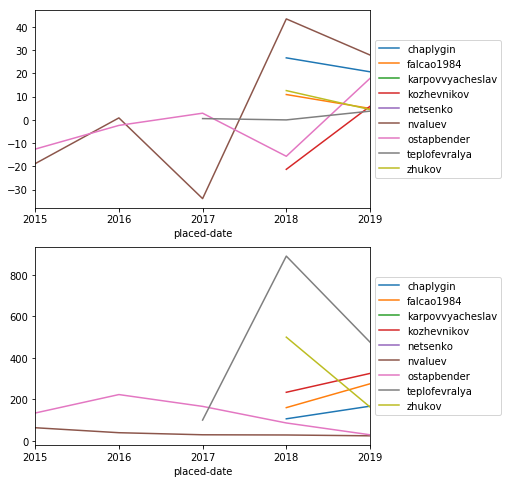

In [5]:
#check yearly progress
df_yearly = ue.calc_win_rate(cand_data, 'Y', 20)
df_r = df_yearly.pivot(index='placed-date', columns='author', values='success_rate')
df_c = df_yearly.pivot(index='placed-date', columns='author', values='count')
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey='row', figsize=(6,8))
df_r.plot(ax=ax1)
df_c.plot(ax=ax2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
### only valuev, ostapbender and teplofevralya have long history
### valuev only last two years shows profit meanwhile number of bets decreased
### ostapbender shows profit only in 2019 after dramatically descreasing a number of bets
### teplofevralya shows profit after decreasing the number of bets by a half

In [6]:
#check recent monthly progress
#find min thres
df = ue.calc_win_rate(cand_data[cand_data['placed-date']>=datetime.date(2018, 1, 1)], 'M')
df = df.groupby(by='author').agg({'count':'mean'})
df.reset_index(inplace=True)
group1 = df[df['count'] >= 10]['author'].tolist()
group2 = df[df['count'] < 10]['author'].tolist()
df.sort_values(by='count', ascending=False)
### group1 - mid/high velocity and 'comparable' standard deviation
### group2 - sets simetime may consist of only one observation

,author,count
7,teplofevralya,59.434783
3,kozhevnikov,43.000000
8,zhukov,31.571429
4,netsenko,24.400000
1,falcao1984,22.894737
0,chaplygin,11.869565
2,karpovvyacheslav,7.500000
6,ostapbender,5.750000
5,nvaluev,2.476190


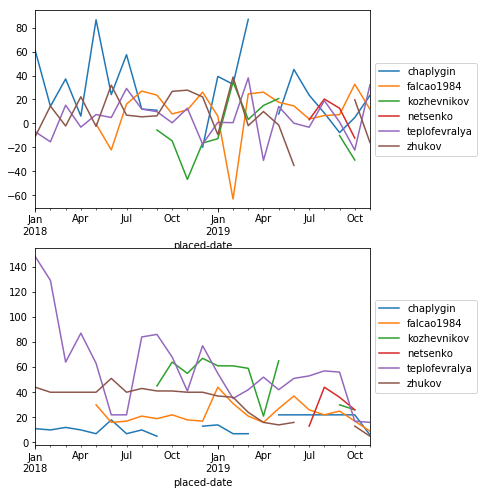

In [7]:
df_1 = ue.calc_win_rate(
    cand_data[
        (cand_data['placed-date']>=datetime.date(2018, 1, 1)) 
        & (cand_data.author.isin(group1))], 
    'M', 5)
df_r = df_1.pivot(index='placed-date', columns='author', values='success_rate')
df_c = df_1.pivot(index='placed-date', columns='author', values='count')
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey='row', figsize=(6,8))
df_r.plot(ax=ax1)
df_c.plot(ax=ax2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
### trendlines could help in a future, but quarter stats may be used for now
### chaplygin increasing his numbers, but profit goes down
### netsenko just started
### zhukov wasn't active for a some time. Reduced his betting and then lost heavily
### kozhevnikov not that active recently, and not successful
### falcao1984 is consistent. Had only one period, where he lost big, 
###     and he made more bets, than ususal that time
### teplofevralya profit increases as number of bets decreases


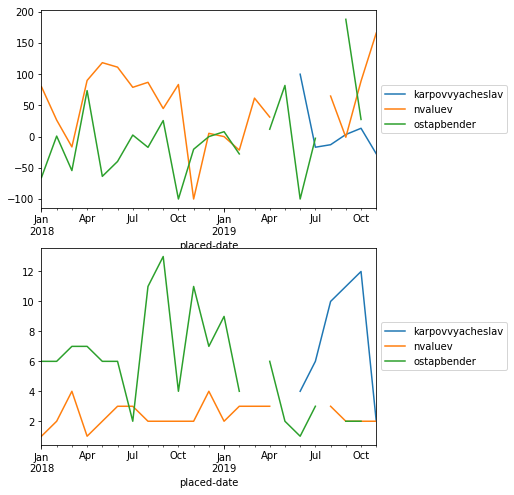

In [8]:
df_2 = ue.calc_win_rate(
    cand_data[
        (cand_data['placed-date']>=datetime.date(2018, 1, 1)) 
        & (cand_data.author.isin(group2))], 
    'M')
df_r = df_2.pivot(index='placed-date', columns='author', values='success_rate')
df_c = df_2.pivot(index='placed-date', columns='author', values='count')
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey='row', figsize=(6,8))
df_r.plot(ax=ax1)
df_c.plot(ax=ax2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
### ostapbender not stable moving forward, decreasing a number of bets
### nvaluev keeps his level of profit and low number of bets
### karpovvyacheslav just started, not much data

In [9]:
### nvaluev and ostapbender worth a try, but mot much to actually explore
df_sum_19[df_sum_19.author.isin(['nvaluev', 'ostapbender'])]

,author,count,return,win,success_rate
29,nvaluev,24.0,30.70,6.70,27.916667
31,ostapbender,29.0,34.18,5.18,17.862069


In [10]:
### zhukov, kozhevnikov, netsenko have another shot together
df_sum_19[df_sum_19.author.isin(['zhukov', 'kozhevnikov', 'netsenko'])]

,author,count,return,win,success_rate
26,netsenko,122.0,129.73,7.73,6.336066
21,kozhevnikov,325.0,343.99,18.99,5.843077
41,zhukov,163.0,170.23,7.23,4.435583


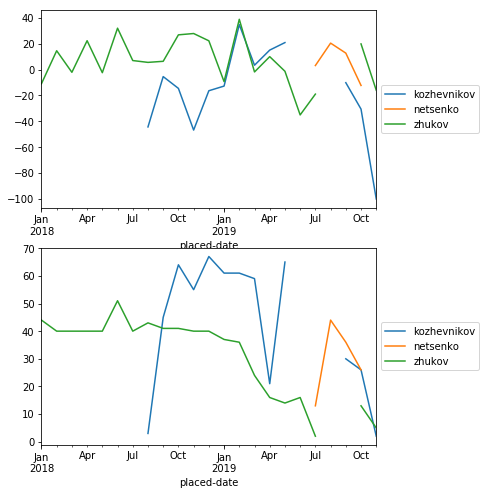

In [11]:
group3 = ['zhukov', 'kozhevnikov', 'netsenko']
df_3 = ue.calc_win_rate(
    cand_data[
        (cand_data['placed-date']>=datetime.date(2018, 1, 1)) 
        & (cand_data.author.isin(group3))], 
    'M')
df_r = df_3.pivot(index='placed-date', columns='author', values='success_rate')
df_c = df_3.pivot(index='placed-date', columns='author', values='count')
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey='row', figsize=(6,8))
df_r.plot(ax=ax1)
df_c.plot(ax=ax2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
### nothing to conclude here...

In [12]:
### worth deeper exploration: chaplygin, falcao1984, teplofevralya
df_sum_19[df_sum_19.author.isin(['chaplygin', 'falcao1984', 'teplofevralya'])]

,author,count,return,win,success_rate
7,chaplygin,167.0,201.56,34.56,20.694611
13,falcao1984,275.0,288.52,13.52,4.916364
36,teplofevralya,476.0,493.88,17.88,3.756303


In [13]:
ue.summary_chart(
    cand_data[
        (cand_data['placed-date']>=datetime.date(2019, 5, 1)) 
        & (cand_data.author.isin(['chaplygin', 'falcao1984', 'teplofevralya']))])

,author,count,return,win,success_rate
0,chaplygin,138,157.57,19.57,14.181159
1,falcao1984,163,184.06,21.06,12.920245
2,teplofevralya,292,309.24,17.24,5.904110
